# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [239]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [240]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [241]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [242]:
# 2. Get the total drivers for each city type
drivers_by_city_type = city_data_df.groupby(["type"])["driver_count"].sum()

In [243]:
#  3. Get the total amount of fares for each city type
fare_by_city_type = pyber_data_df.groupby(['type']).sum()["fare"]

In [244]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]/rides_by_city_type

In [245]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"]/drivers_by_city_type

In [246]:
#  6. Create a PyBer summary DataFrame. 
summary_dictionary={"Total Rides": rides_by_city_type, "Total Drivers": drivers_by_city_type, "Total Fares": fare_by_city_type, "Average Fare per Ride": avg_fare_by_city_type, "Average Fare per Driver": avg_fare_per_driver} 
pyber_summary_df=pd.DataFrame(summary_dictionary)

In [247]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [248]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [249]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [250]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_df=pyber_data_df.groupby(["type","date"]).sum()["fare"]

In [251]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_df=pyber_data_df.groupby(["type","date"]).sum()["fare"].reset_index()

In [259]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date=fare_by_date_df.pivot(index="date", columns="type", values='fare')

In [253]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
given_dates=fare_by_date.loc['2019-01-01':'2019-04-29']

In [254]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
given_dates.index= pd.to_datetime(given_dates.index)

In [255]:
# 7. Check that the datatype for the index is datetime using df.info()
given_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [256]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_per_wk=given_dates.resample('W').sum()

<function matplotlib.pyplot.show(close=None, block=None)>

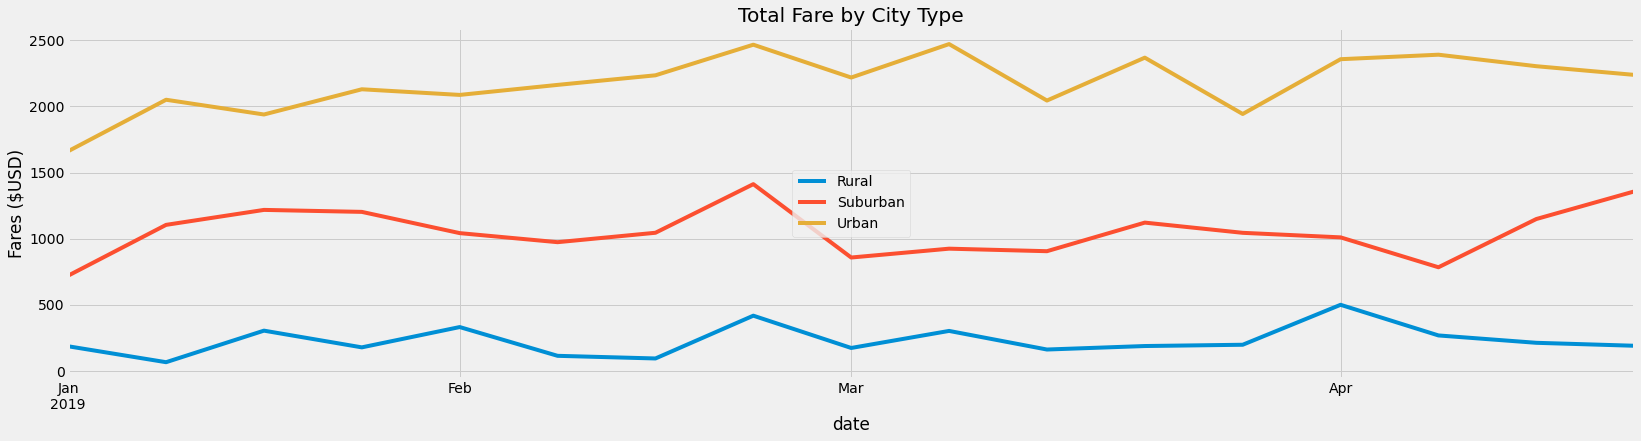

In [257]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax=fares_per_wk.plot(figsize=(25,6))
plt.ylabel("Fares ($USD)")
plt.title("Total Fare by City Type")
plt.legend(loc=10)
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show
